# Virtual River: hydraulic module

<img src="images/rivercare_logo.jpg">

This notebook contains the interface to the Virtual River hydraulic module. The Virtual River is a serious game developed within the RiverCare research programme. This notebook requires a Python 3.6 kernel with ipywidgets version 0.7 or higher. The hydraulic module is build with the "Dotter model" developed by Deltares.

### Contact 
* R.J. den Haan (r.j.denhaan@utwente.nl) (Virtual River)
* K.D. Berends (k.d.berends@utwente.nl) (Hydraulic module)


In [1]:
%matplotlib inline
from ipywidgets import interact, interactive, interact_manual, IntSlider, Layout, VBox, HBox, interactive_output
from IPython.display import clear_output, display, HTML
from collections import OrderedDict
from Dotter import dotter 
from Dotter import Functions as F
import matplotlib.pyplot as plt
import numpy as np

# Setting up the system

We load the river system from Dotter configuration files. Additionally, we need a list of sections and a covariance matrix that describes the relative input of each section on the roughness at locations along the river.


In [2]:
# Load configuration files
case = 'example_06'
stream = dotter.build_model_from_config('cases/{}/config.ini'.format(case))

# Covariance matrix
CV = np.loadtxt('cases/example_06/covariance_matrix.csv', delimiter=',')
SECTIONS = np.array([0.07, 0.06, 0.05, 0.04, 0.08, 0.06, 0.05, 0.04, 0.07, 0.06, 0.07, 0.06, 0.05, 0.04, 0.08, 0.06, 0.05, 0.04, 0.07, 0.03])




Initialising geometry...
Loading lateral sources...
Generating computational grid...
Planting vegetation...
Loading events...
Model loaded


Next, we define a function that calls and plots the system, given the relative roughness of each section:

In [3]:
STREAM = stream
def virtual_river(**kwargs):
    localstream = STREAM
    for i, (sec, value) in enumerate(kwargs.items()):
        SECTIONS[i] = value *0.025 + 0.03 
    
    localstream.n = np.dot(SECTIONS, CV)
    localstream.generate_grid()
    
    
    # Run the model for only 1 timestep


    results, stream = dotter.run_model(localstream, stoptime=1, verbose=False)
    prefs = F.load_plotting_config('cases/{case}/plotting.ini'.format(case=case))
    dotter.plot(localstream, plottype=3, xlim=[0, 10000])
    plt.show()

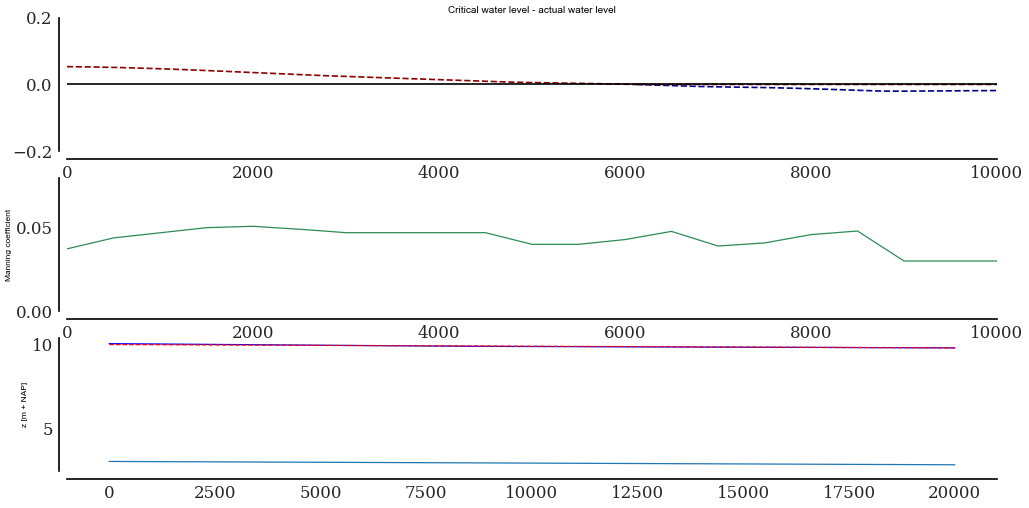

In [4]:
virtual_river()

In [6]:
interactive_sections = OrderedDict()
for i in range(20):
    interactive_sections["section{:02d}".format(i)] = IntSlider(min=0,
                                                               max=4, 
                                                               continuous_update=False, 
                                                               description='Section {}'.format(i+1), 
                                                               layout=Layout(flex='2 1 auto', width='auto'))

# Water manager sections
for i in [5, 10, 11, 14]:
    interactive_sections["section{:02d}".format(i-1)].style.handle_color = 'cadetblue'

# Eco-manager sections
for i in [1, 3, 7, 8, 12, 15]:
    interactive_sections["section{:02d}".format(i-1)].style.handle_color = 'forestgreen'

# Provincial manager
for i in [2, 4, 6, 9, 13, 16]:
    interactive_sections["section{:02d}".format(i-1)].style.handle_color = 'crimson'

# Inactive
for i in [17, 18, 19]:
    interactive_sections["section{:02d}".format(i-1)].style.handle_color = 'azure'

# Riverbed
for i in [20]:
    interactive_sections["section{:02d}".format(i-1)].style.handle_color = 'hotpink'
    
# Create gridded button interface
left_column = list()
right_column = list()

for i in range(10):
    left_column.append(interactive_sections["section{:02d}".format(i)])
    right_column.append(interactive_sections["section{:02d}".format(i+10)])

ui = HBox([VBox(left_column), VBox(right_column)])

out = interactive_output(virtual_river, interactive_sections)
display(ui, out)

HBox(children=(VBox(children=(IntSlider(value=0, continuous_update=False, description='Section 1', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 2', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 3', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 4', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 5', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='cadetblue')), IntSlider(value=0, continuous_update=False, description='Section 6', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 7', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 8', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 9', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 10', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='cadetblue')))), VBox(children=(IntSlider(value=0, continuous_update=False, description='Section 11', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='cadetblue')), IntSlider(value=0, continuous_update=False, description='Section 12', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 13', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 14', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='cadetblue')), IntSlider(value=0, continuous_update=False, description='Section 15', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='forestgreen')), IntSlider(value=0, continuous_update=False, description='Section 16', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='crimson')), IntSlider(value=0, continuous_update=False, description='Section 17', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='azure')), IntSlider(value=0, continuous_update=False, description='Section 18', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='azure')), IntSlider(value=0, continuous_update=False, description='Section 19', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='azure')), IntSlider(value=0, continuous_update=False, description='Section 20', layout=Layout(flex='2 1 auto', width='auto'), max=4, style=SliderStyle(handle_color='hotpink'))))))

Output()